## Word2Vec

- Convert word to a vector such that vector can show the meaning of the word.
- Adding and subtracting these word vectors can give new word
**Example**
  - KING - MAN + WOMEN = QUEEN
  - The word KING have certain properties(FEATURES) like (authority = 1, has tail = 0, rich = 1, gender = -1)
  - Thus, KING = [1, 0, 1, -1]
  - Similarly HORSE have ((authority = 0, has tail = 1, rich = 0, gender = -1))
  - Thus, HORSE = [0, 1, 0, -1]
  - We can do this for all types of vocabulary in langunage

    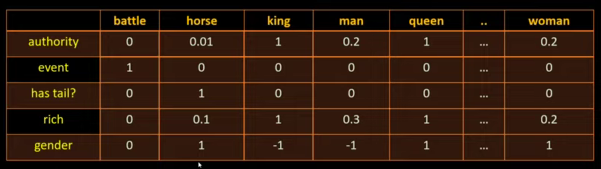

  - We can compute the following using these vectors

    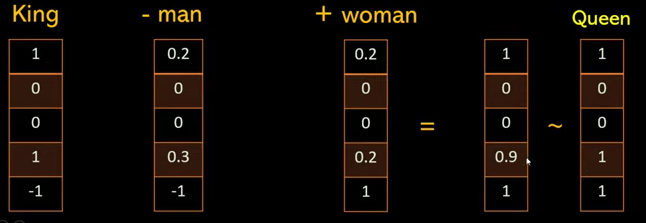
    
- Embeddings are not hand crafted. Instead, they are learnt during neural network training.
  1) Take a fake problem
  2) Solve it using neural network
  3) You get word embeddings as a side effect
**Example**
  - Lets say we have a problem:
  - fake problem - fill in a missing word in a sentence
  - we have a sentence of story of Ashoka and we have to find the missing words
   
   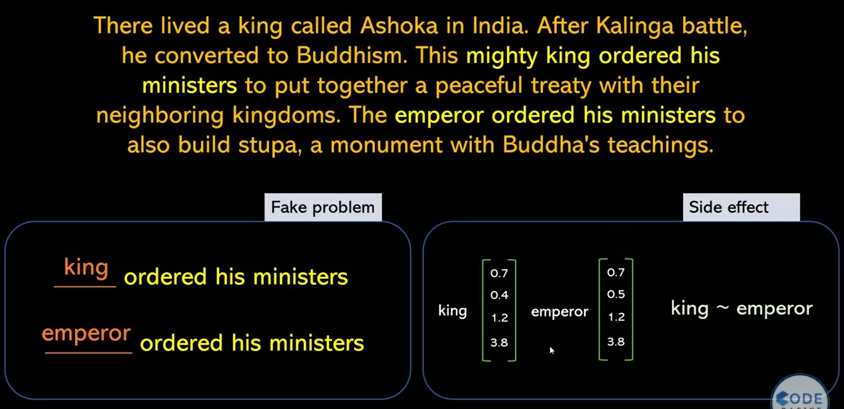

  - During the training the Neural Network will create Vector Embeddings of words to solve the problem.
  - And because of training the vector of words King and Emperor will be quite similar.
  - We can extract these vocabulary word embeddings.
   
- Meaning of a word can be inferred by the surrounding words
- These surrounding words are also called CONTEXT.

In [ ]:
# !pip install gensim
# !pip install python-Levenshtein

In [2]:
# We will use amazon product reviews dataset(not same as video)
# dataset link - https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products 
# we will use Gensim library for NLP
import gensim
import pandas as pd

df = pd.read_csv(r"C:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\Deep_Learning\NN_Datasets\amazon_reviews.csv")
df.head()

C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_2688\1849734861.py:6: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\Deep_Learning\NN_Datasets\amazon_reviews.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
df.shape

(34660, 21)

In [9]:
df["reviews.text"][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

In [10]:
# to tokenize these review and remove puncuations marks(' . , ! ? etc.), common words(I, the , a etc.)
# also convert every word to lowercase
# we use gensim libraray to preprocess this data(not very perfect but good enough processing)

gensim.utils.simple_preprocess(df["reviews.text"][0])

['this',
 'product',
 'so',
 'far',
 'has',
 'not',
 'disappointed',
 'my',
 'children',
 'love',
 'to',
 'use',
 'it',
 'and',
 'like',
 'the',
 'ability',
 'to',
 'monitor',
 'control',
 'what',
 'content',
 'they',
 'see',
 'with',
 'ease']

In [25]:
df1 = df["reviews.text"].apply(str) # converting all to strings
df1

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I've had my Fire HD 8 two weeks now and I love...
4        I bought this for my grand daughter when she c...
                               ...                        
34655    This is not appreciably faster than any other ...
34656    Amazon should include this charger with the Ki...
34657    Love my Kindle Fire but I am really disappoint...
34658    I was surprised to find it did not come with a...
34659    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 34660, dtype: object

In [26]:
review_text = df1.apply(gensim.utils.simple_preprocess)
review_text

0        [this, product, so, far, has, not, disappointe...
1        [great, for, beginner, or, experienced, person...
2        [inexpensive, tablet, for, him, to, use, and, ...
3        [ve, had, my, fire, hd, two, weeks, now, and, ...
4        [bought, this, for, my, grand, daughter, when,...
                               ...                        
34655    [this, is, not, appreciably, faster, than, any...
34656    [amazon, should, include, this, charger, with,...
34657    [love, my, kindle, fire, but, am, really, disa...
34658    [was, surprised, to, find, it, did, not, come,...
34659    [to, spite, the, fact, that, have, nothing, bu...
Name: reviews.text, Length: 34660, dtype: object

In [27]:
# create model with gensim word2vec
model = gensim.models.Word2Vec(
    window=10, # this means 10 words before and after the target word
    min_count=2, # if you have less than 2 words in a sentence then don't use that sentence(atleast 2 words is required to use the sentence for training)
    workers=4, # depends on number of cores in cpu(this machine have 6 cores)4 means training will happen parallely in 4 threads
)

In [28]:
model.build_vocab(review_text, progress_per=1000) # progress_per(Indicates how many words to process before showing/updating the progress.)

In [29]:
model.epochs

5

In [30]:
model.corpus_count

34660

In [31]:
# training the model
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(3506329, 4950220)

In [33]:
# save the model
model.save("./10_Word2Vec_Model_amazon_review.model") # now you can use that model file deply in cloud and use for nlp task

In [35]:
model.wv.most_similar("good") # this will show the words similar or close to "good"
# this will become more accurate if dataset increases

[('decent', 0.792664110660553),
 ('nice', 0.7616170644760132),
 ('great', 0.7339519262313843),
 ('fantastic', 0.6224822998046875),
 ('ok', 0.6075676679611206),
 ('neat', 0.6048433780670166),
 ('cool', 0.599583089351654),
 ('high', 0.5932849645614624),
 ('okay', 0.5907451510429382),
 ('wonderful', 0.582231342792511)]

In [39]:
#similarity score between 2 words
model.wv.similarity(w1="great", w2="product")

-0.1103583

In [37]:
model.wv.similarity(w1="great", w2="good")

0.73395187